## Importing libraries and datas

In [1]:
import pandas as pd
import numpy as numpy

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as pyo

In [2]:
df=pd.read_excel("Sample - Superstore.xls")

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## Understanding data's

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [5]:
df.shape

(9994, 21)

In [6]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [7]:
df["Order Date"].min(),df["Order Date"].max()

(Timestamp('2014-01-03 00:00:00'), Timestamp('2017-12-30 00:00:00'))

## Exploratory Data Analysis

In [8]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [9]:
total_customers=(len(list(df["Customer ID"].unique())))

In [10]:
temp_df=df[["Customer ID","Segment"]]
customer_df=temp_df.drop_duplicates("Customer ID")
customer_df=customer_df.reset_index()
customer_df=customer_df.drop(["index"],axis=1)

Total Customers:793
Consumer       409
Corporate      236
Home Office    148
Name: Segment, dtype: int64


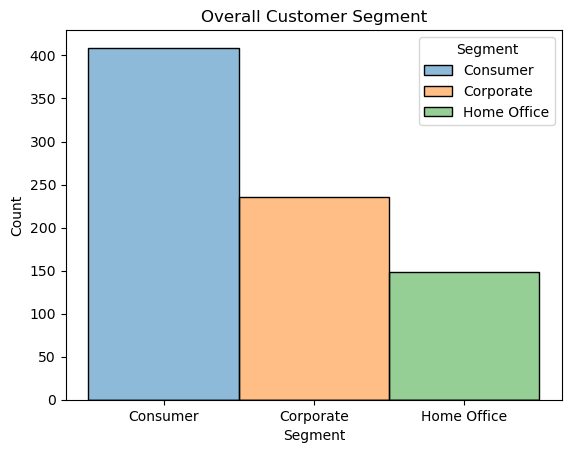

In [11]:
sns.histplot(data=customer_df,x="Segment",color="g",stat="count",hue="Segment").set(title="Overall Customer Segment")
print(f"Total Customers:{total_customers}")
print(customer_df["Segment"].value_counts())

In [12]:
df["Country"].value_counts()

United States    9994
Name: Country, dtype: int64

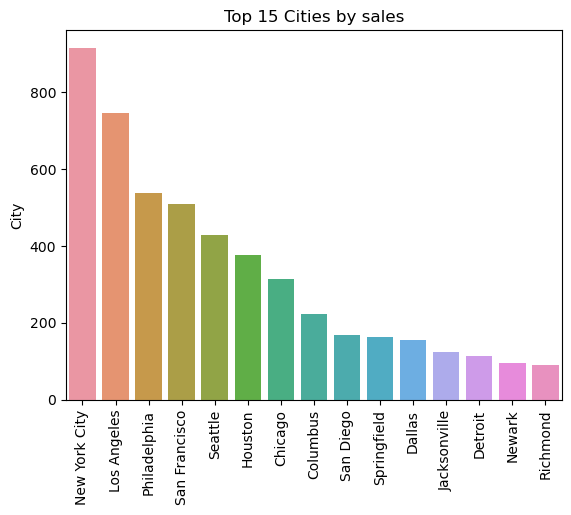

In [13]:
city_df=pd.DataFrame(df["City"].value_counts())
city_df=city_df.sort_values("City",ascending=False)
#city_df=city_df.reset_index()
sns.barplot(city_df.head(15),x=city_df.head(15).index,y=city_df.head(15)["City"])
plt.xticks(rotation=90)
plt.title("Top 15 Cities by sales")
plt.show()

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64


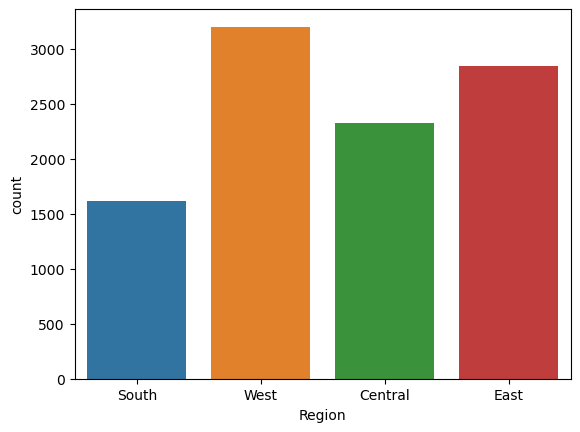

In [14]:
sns.countplot(data=df,x=df["Region"])
print(df["Region"].value_counts())
plt.show()

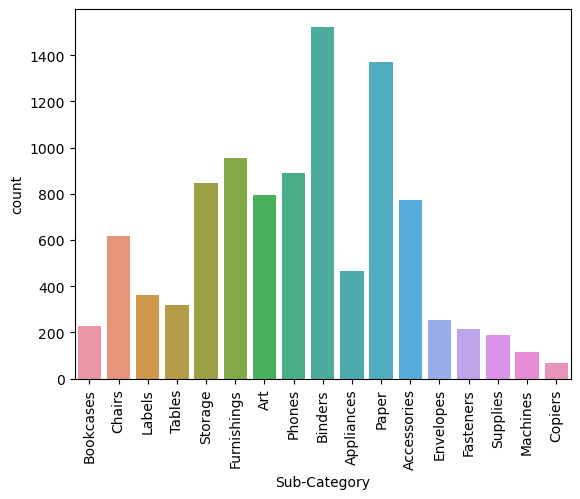

In [15]:
sns.countplot(data=df,x=df["Sub-Category"])
plt.xticks(rotation=90)
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_15848\4261984733.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



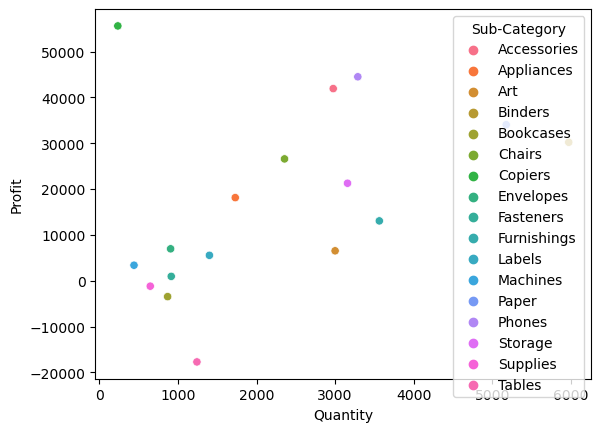

In [16]:
df_sale=df.groupby("Sub-Category")["Quantity","Profit"].sum()
sns.scatterplot(data=df_sale,x=df_sale["Quantity"],y=df_sale["Profit"],hue=df_sale.index)
plt.show()

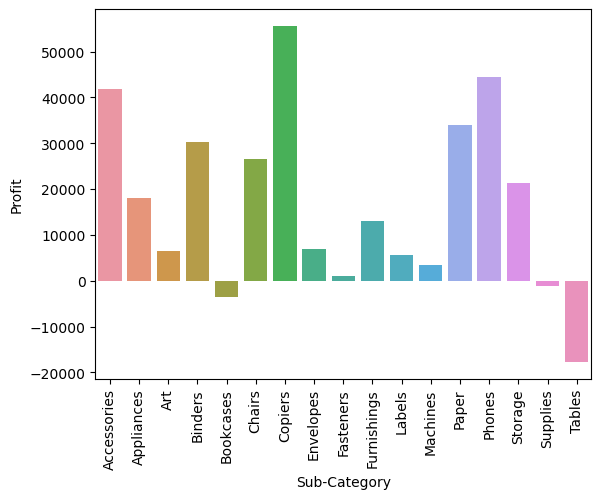

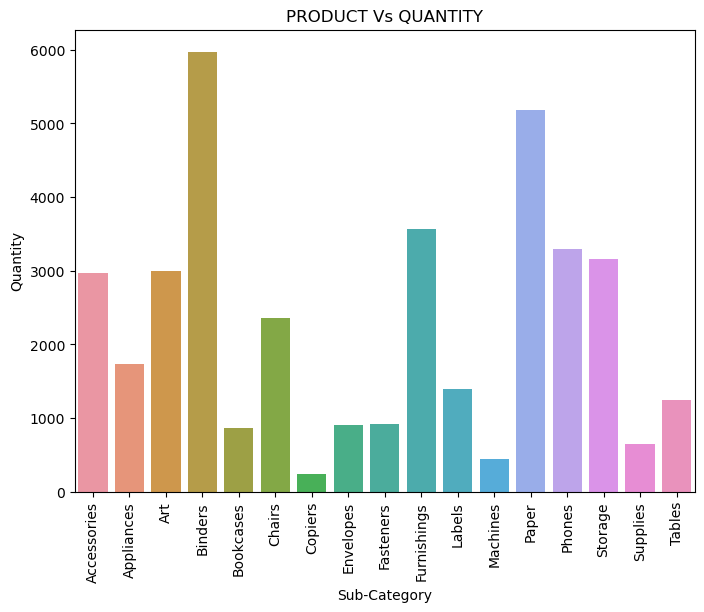

<Figure size 800x600 with 0 Axes>

In [17]:
#plt.subplot(2,1,1)
sns.barplot(data=df_sale,x=df_sale.index,y=df_sale["Profit"])
plt.xticks(rotation=90)
plt.figure(figsize=(8, 6))
plt.title("PRODUCT Vs PROFIT")

#plt.subplot(2,1,2)
sns.barplot(data=df_sale,x=df_sale.index,y=df_sale["Quantity"])
plt.xticks(rotation=90)
plt.title("PRODUCT Vs QUANTITY")
plt.figure(figsize=(8, 6))
plt.tight_layout()
plt.show()

## Finding Recency

In [18]:
df_recency=df.groupby(by=["Customer ID","Customer Name"],as_index=False)["Order Date"].max()

In [19]:
df_recency.columns=["Customer ID","Customer Name","latest purchase date"]
recent_date=df_recency["latest purchase date"].max()
df_recency["Recency"] = df_recency["latest purchase date"].apply(lambda x: (recent_date - x).days)
df_recency.head()

,Customer ID,Customer Name,latest purchase date,Recency
0,AA-10315,Alex Avila,2017-06-29,184
1,AA-10375,Allen Armold,2017-12-11,19
2,AA-10480,Andrew Allen,2017-04-15,259
3,AA-10645,Anna Andreadi,2017-11-05,55
4,AB-10015,Aaron Bergman,2016-11-10,415


## Finding Frequency

In [20]:
frequency_df=df.drop_duplicates().groupby(
by=["Customer ID","Customer Name"],as_index=False)["Order Date"].count()
frequency_df.columns=["Customer ID","Customer Name","Frequency"]
frequency_df.head()

,Customer ID,Customer Name,Frequency
0,AA-10315,Alex Avila,11
1,AA-10375,Allen Armold,15
2,AA-10480,Andrew Allen,12
3,AA-10645,Anna Andreadi,18
4,AB-10015,Aaron Bergman,6


## Finding Monetary

In [21]:
Monetary_df=df.drop_duplicates().groupby(
by=["Customer ID","Customer Name"],as_index=False)["Sales"].sum()
Monetary_df.columns=["Customer ID","Customer Name","Monetary"]
Monetary_df.head()

,Customer ID,Customer Name,Monetary
0,AA-10315,Alex Avila,5563.560
1,AA-10375,Allen Armold,1056.390
2,AA-10480,Andrew Allen,1790.512
3,AA-10645,Anna Andreadi,5086.935
4,AB-10015,Aaron Bergman,886.156


## Merging Derived data's

In [22]:
rf_df=df_recency.merge(frequency_df,on=["Customer ID","Customer Name"])

In [23]:
rfm_df = rf_df.merge(Monetary_df,on=["Customer ID","Customer Name"])

In [24]:
rfm_df=rfm_df.drop(columns="latest purchase date")

In [25]:
rfm_df.head()

,Customer ID,Customer Name,Recency,Frequency,Monetary
0,AA-10315,Alex Avila,184,11,5563.560
1,AA-10375,Allen Armold,19,15,1056.390
2,AA-10480,Andrew Allen,259,12,1790.512
3,AA-10645,Anna Andreadi,55,18,5086.935
4,AB-10015,Aaron Bergman,415,6,886.156


In [26]:
rfm_df['RecencyScore'] = pd.qcut(rfm_df['Recency'], q=3, labels=[3, 2, 1])
rfm_df['FrequencyScore'] = pd.qcut(rfm_df['Frequency'], q=3, labels=[1, 2, 3])
rfm_df['MonetaryScore'] = pd.qcut(rfm_df['Monetary'], q=3, labels=[1, 2, 3])
rfm_df['RFM_value'] = rfm_df['RecencyScore'].astype(str) + rfm_df['FrequencyScore'].astype(str) + rfm_df['MonetaryScore'].astype(str)


## RFM Score

In [27]:
rfm_df["RFM_Score"] = rfm_df["RecencyScore"].astype(int) + rfm_df["FrequencyScore"].astype(int) + rfm_df["MonetaryScore"].astype(int)

In [28]:
rfm_df.head()

,Customer ID,Customer Name,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_value,RFM_Score
0,AA-10315,Alex Avila,184,11,5563.560,1,2,3,123,6
1,AA-10375,Allen Armold,19,15,1056.390,3,3,1,331,7
2,AA-10480,Andrew Allen,259,12,1790.512,1,2,2,122,5
3,AA-10645,Anna Andreadi,55,18,5086.935,2,3,3,233,8
4,AB-10015,Aaron Bergman,415,6,886.156,1,1,1,111,3


In [29]:
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 793 entries, 0 to 792
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Customer ID     793 non-null    object  
 1   Customer Name   793 non-null    object  
 2   Recency         793 non-null    int64   
 3   Frequency       793 non-null    int64   
 4   Monetary        793 non-null    float64 
 5   RecencyScore    793 non-null    category
 6   FrequencyScore  793 non-null    category
 7   MonetaryScore   793 non-null    category
 8   RFM_value       793 non-null    object  
 9   RFM_Score       793 non-null    int32   
dtypes: category(3), float64(1), int32(1), int64(2), object(3)
memory usage: 49.2+ KB


## Segmenting

In [30]:
rfm_df['Segment'] = pd.qcut(rfm_df['RFM_Score'], q=4, labels=["bronze","Silver","Gold","Platinum"])

In [31]:
rfm_df.head()

,Customer ID,Customer Name,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_value,RFM_Score,Segment
0,AA-10315,Alex Avila,184,11,5563.560,1,2,3,123,6,Silver
1,AA-10375,Allen Armold,19,15,1056.390,3,3,1,331,7,Gold
2,AA-10480,Andrew Allen,259,12,1790.512,1,2,2,122,5,bronze
3,AA-10645,Anna Andreadi,55,18,5086.935,2,3,3,233,8,Platinum
4,AB-10015,Aaron Bergman,415,6,886.156,1,1,1,111,3,bronze


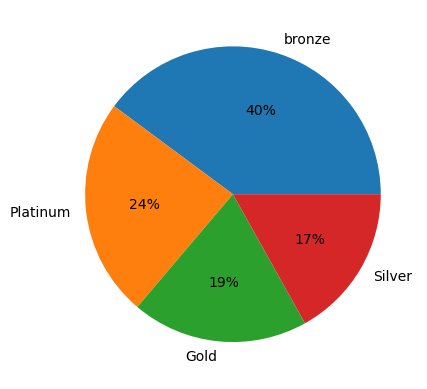

In [32]:
plt.pie(rfm_df["Segment"].value_counts(),labels=rfm_df["Segment"].value_counts().index,autopct="%.0f%%")
plt.show()